In [ ]:
import sys
!{sys.executable} -m pip install  matplotlib pandas numpy pandasql openpyxl nx pydot graphviz openpyxl
!{sys.executable} -m pip install ipyleaflet pandasql
!{sys.executable} -m pip install xlrd pyexcel
!{sys.executable} -m pip install networkx

In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
from ipyleaflet import *

In [14]:
## montreal
lat, lon = 45.30, -73.33
m = Map(center=(lat, lon),zoom=8, basemap=basemaps.Esri.WorldStreetMap)
m

Map(center=[45.3, -73.33], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [16]:
dataset_path ="./DataSets/Montreal/"
stops = gpd.read_file(dataset_path+ "stm_arrets_sig.shp")
lines = gpd.read_file(dataset_path+ "stm_lignes_sig.shp")

In [18]:
stops.head(5)

,stop_id,stop_code,stop_name,stop_url,wheelchair,route_id,loc_type,service_id,geometry
0,43-01,10118,Station Angrignon,None,2,None,2,22J,POINT (296677.562 5034048.338)
1,43,10118,Station Angrignon,http://www.stm.info/fr/infos/reseaux/metro/ang...,2,1,0,22J,POINT (296733.669 5034064.602)
2,42-01,10120,Station Monk - Édicule Nord (B),None,2,None,2,22J,POINT (297515.753 5034601.626)
3,42-02,10120,Station Monk - Édicule Sud (A),None,2,None,2,22J,POINT (297496.004 5034568.310)
4,42,10120,Station Monk,http://www.stm.info/fr/infos/reseaux/metro/monk,2,1,0,22J,POINT (297506.817 5034585.078)


<AxesSubplot:>

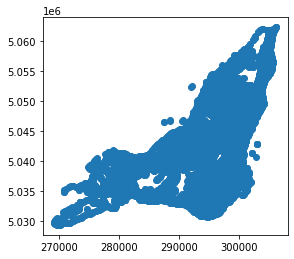

In [21]:
stops.plot()

In [19]:
lines.head(3)

,route_id,headsign,route_name,shape_id,service_id,geometry
0,1,STATION ANGRIGNON,verte,11072,22J,"LINESTRING (302040.087 5050741.446, 301735.980..."
1,1,STATION HONORÉ-BEAUGRAND,verte,11071,22J,"LINESTRING (296733.669 5034064.602, 297506.817..."
2,2,STATION CÔTE-VERTU,orange,20238,22J,"LINESTRING (291670.183 5046165.402, 292618.193..."


<AxesSubplot:>

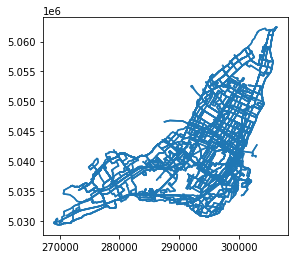

In [23]:
lines.plot()

In [30]:
lines.route_name.unique()

array(['verte', 'orange', 'jaune', 'bleue', 'De Lorimier',
       'Parc-du-Mont-Royal / Ridgewood', 'Île-des-Soeurs',
       'Christophe-Colomb', 'Atateken', 'Sainte-Catherine', 'Graham',
       'Décarie', 'Beaubien', 'Chabanel / Marché Central',
       'Place du Commerce', 'Notre-Dame', 'Sherbrooke', 'Angus',
       'Mercier-Est', 'Boulevard Saint-Joseph', 'Honoré-Beaugrand',
       'Rachel', 'Saint-Denis / Saint-Hubert', 'Saint-Denis',
       'Lacordaire', 'Langelier', 'Griffintown', 'Monk', 'Jolicoeur',
       'Des Grandes-Prairies', 'Henri-Bourassa-Est',
       'Quartier Saint-Michel / Ahuntsic', 'Monselet',
       'Armand-Bombardier', 'Papineau', 'Casgrain', 'Masson', 'Perras',
       'Maurice-Duplessis', 'Édouard-Montpetit', 'de Liège',
       'Charland / Chabanel', 'Boulevard Saint-Laurent', 'Saint-Hubert',
       'Pointe-Saint-Charles', 'Wellington', 'Girouard', 'Grenet',
       'The Boulevard', 'Saint-Michel', 'Pierrefonds', 'Gouin',
       'Bois-Franc', 'Du Centre', 'Alfred-N

In [34]:
metroLines = lines.query("route_name in ('verte', 'orange', 'jaune', 'bleue')")

In [35]:
metroLines

,route_id,headsign,route_name,shape_id,service_id,geometry
0,1,STATION ANGRIGNON,verte,11072,22J,"LINESTRING (302040.087 5050741.446, 301735.980..."
1,1,STATION HONORÉ-BEAUGRAND,verte,11071,22J,"LINESTRING (296733.669 5034064.602, 297506.817..."
2,2,STATION CÔTE-VERTU,orange,20238,22J,"LINESTRING (291670.183 5046165.402, 292618.193..."
3,2,STATION CÔTE-VERTU,orange,20236,22J,"LINESTRING (287432.768 5046526.781, 288453.790..."
4,2,STATION HENRI-BOURASSA,orange,20239,22J,"LINESTRING (290521.096 5041607.071, 291141.889..."
5,2,STATION MONTMORENCY,orange,20237,22J,"LINESTRING (290521.096 5041607.071, 291141.889..."
6,2,STATION MONTMORENCY,orange,20022,22J,"LINESTRING (291670.183 5046165.402, 290567.568..."
7,4,STATION BERRI-UQAM,jaune,40025,22J,"LINESTRING (303073.797 5042774.938, 302211.686..."
8,4,STATION LONGUEUIL–UNIVERSITÉ-DE-SHERBROOKE,jaune,40024,22J,"LINESTRING (300033.101 5041698.654, 302211.686..."
9,5,STATION SAINT-MICHEL,bleue,51763,22J,"LINESTRING (294813.179 5038394.429, 295156.815..."


<AxesSubplot:>

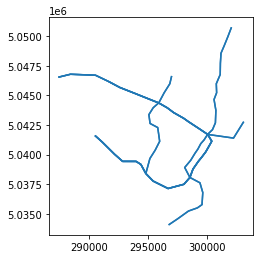

In [36]:
metroLines.plot()

In [83]:
type(metroLines.iloc[0]["geometry"].xy)

tuple

In [84]:
## https://www.askpython.com/python/examples/find-all-methods-of-class
method_list = [method for method in dir(type(metroLines.iloc[0]["geometry"])) if method.startswith('__') is False]
print(method_list)

['count', 'index']


In [106]:
for var in metroLines.iloc[0]["geometry"].xy:
    print (metroLines.iloc[0]["geometry"].xy.index(var),var)


0 array('d', [302040.08698887925, 301735.9800496101, 301434.085826425, 301154.5707738784, 301105.21974628884, 301089.5112175822, 300759.0235528197, 300787.1114946245, 300568.0104310952, 300723.2896533833, 300682.9968258974, 300437.77947120095, 300027.71336594585, 299729.1177413551, 299452.7223589668, 299205.938862015, 298961.0951102574, 298601.41783530865, 298092.59200418176, 298531.9733084029, 299379.30917014927, 299618.5654124837, 299554.61555715505, 299167.50134502025, 298410.9715306593, 297506.81705234107, 296733.6694496933])
1 array('d', [5050741.446281152, 5049947.992219213, 5049204.117573726, 5048549.373054481, 5047709.467081106, 5046753.965644537, 5045976.36005807, 5045214.424707685, 5044646.131965919, 5043733.308386388, 5042675.811703049, 5042102.875362795, 5041702.547245329, 5041236.810169433, 5040924.428933361, 5040462.7851021765, 5040109.05719425, 5039519.410178113, 5038908.493553283, 5038068.005886682, 5037617.807275292, 5036795.021019222, 5035776.124424324, 5035503.858077

In [104]:
type(metroLines.iloc[0]["geometry"].xy[0])

array.array

In [109]:
len(metroLines.iloc[0]["geometry"].xy[0])

27

In [116]:
arr_coord_x=metroLines.iloc[0]["geometry"].xy[0]

In [117]:
arr_coord_y=metroLines.iloc[0]["geometry"].xy[1]

In [82]:
## iloc: access by index
print(metroLines.iloc[0]["geometry"].xy)

[array('d', [302040.08698887925, 301735.9800496101, 301434.085826425, 301154.5707738784, 301105.21974628884, 301089.5112175822, 300759.0235528197, 300787.1114946245, 300568.0104310952, 300723.2896533833, 300682.9968258974, 300437.77947120095, 300027.71336594585, 299729.1177413551, 299452.7223589668, 299205.938862015, 298961.0951102574, 298601.41783530865, 298092.59200418176, 298531.9733084029, 299379.30917014927, 299618.5654124837, 299554.61555715505, 299167.50134502025, 298410.9715306593, 297506.81705234107, 296733.6694496933]), array('d', [5050741.446281152, 5049947.992219213, 5049204.117573726, 5048549.373054481, 5047709.467081106, 5046753.965644537, 5045976.36005807, 5045214.424707685, 5044646.131965919, 5043733.308386388, 5042675.811703049, 5042102.875362795, 5041702.547245329, 5041236.810169433, 5040924.428933361, 5040462.7851021765, 5040109.05719425, 5039519.410178113, 5038908.493553283, 5038068.005886682, 5037617.807275292, 5036795.021019222, 5035776.124424324, 5035503.85807709

In [81]:
l = Polyline(locations = list(metroLines.iloc[0]["geometry"].xy)
                , color = "green"
                , fill = False)


ValueError: Can't clean for JSON: array('d', [302040.08698887925, 301735.9800496101, 301434.085826425, 301154.5707738784, 301105.21974628884, 301089.5112175822, 300759.0235528197, 300787.1114946245, 300568.0104310952, 300723.2896533833, 300682.9968258974, 300437.77947120095, 300027.71336594585, 299729.1177413551, 299452.7223589668, 299205.938862015, 298961.0951102574, 298601.41783530865, 298092.59200418176, 298531.9733084029, 299379.30917014927, 299618.5654124837, 299554.61555715505, 299167.50134502025, 298410.9715306593, 297506.81705234107, 296733.6694496933])